**Project Title**: Energy_Consumption_and_Prediction


**Problem Statement** : Increasing energy demand makes it hard to manage resources efficiently.

**Aim** : The aim of the this project is to build a model that predicts energy use based on past data and other factors.

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

By importing these libraries & tools are allowing for data analysis, visualization, machine learning and useful for performing regression, classification, analyzing data efficiently.

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=6a1735d6-9eee-4b1a-8bf7-4e98e1884001
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 102MB/s]


Downloading the file from google drive.

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

Reading the file from the system.

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


I observed here that the **df.head()**
displays the first five rows of the DataFrame, which is useful for checking the data's structure and contents.

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


I observed here that the **df.tail()** displays the last five rows of the DataFrame, which is useful for reviewing the final entries in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


I observed here that **df.info()** provides a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage, which helps in understanding the dataset's structure and identifying missing or inconsistent data.

In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'],errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


I observed here that I applied these conversions, the specified columns are converted to numeric, with non-numeric values replaced by NaN.

In [ ]:
df.shape

(2075259, 9)

I observed here that **df.shape** returns the dimensions of the DataFrame as a tuple, showing the number of rows and columns, which helps in quickly understanding the size of the dataset.

In [ ]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
df.describe(include = object)

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


I observed that **df.describe(include='object')** summarizes categorical columns, showing counts, unique values, top and most frequent value.

In [ ]:
df.isnull().any() # if there are any null values

,0
Date,False
Time,False
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


Here, **df.isnull().any()** checks for null values in each column and returns a **boolean** Series.

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


I observed that running **df.isnull().sum()** provides the total count of null values.

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


I observed here, By using this zeros are filled instead of null.
By using inplace to replace null values permanently.

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [14]:
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df[['Year', 'Month', 'Day', 'Hour', 'Minute']] = df['Date_Time'].apply(lambda x: [x.year, x.month, x.day, x.hour, x.minute]).tolist()
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2


Here, I am Converting date and time from string to date(Year, Month, Day) & time
(Hours, minutes) format.

In [15]:
df['Is_holiday'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.weekday.apply(lambda x: 1.0 if x >= 5 else 0.0)
df['Light'] = df['Time'].str[:2].astype(int).apply(lambda x: 1 if 6 <= x < 18 else 0)
df['Time'] = df['Time'].str.split(':').apply(lambda x: (int(x[0]) * 60 + int(x[1])) / 1440)
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


Finding whether the day is a holiday or not (0 = not holiday, 1= holiday)


In [16]:
df['Is_Daylight'] = (df['Hour'].between(6, 17)).astype(int)
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0,0


Find if the there is sunlight ( 0600-1800 hours) is 1 (light is there).
else 0 (light is not there).

---

# 1. Data Preprocessing & Train-Test Split for Machine Learning :

In [19]:
from sklearn.model_selection import train_test_split

# Check if the columns exist before attempting to drop them
columns_to_drop = ['Date', 'Date_Time', 'Time', 'Date_Time']
existing_columns = df.columns

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:  # Check if there are any columns to drop
    df.drop(columns=columns_to_drop, axis=1, inplace=True)

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
1347712,0.000,244.74,0.8,0.0,0.0,0.0,2009,7,9,15,16,0.0,1,1
378408,0.000,240.60,0.6,0.0,0.0,0.0,2007,9,5,12,12,0.0,1,1
280143,0.098,242.40,1.0,0.0,0.0,0.0,2007,6,29,6,27,0.0,1,1
670820,0.086,243.92,1.4,0.0,0.0,0.0,2008,3,26,13,44,0.0,1,1
1940013,0.098,244.25,1.8,0.0,1.0,1.0,2010,8,24,22,57,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.256,241.69,1.6,0.0,1.0,0.0,2007,6,14,17,2,0.0,1,1
1414414,0.230,241.14,15.6,38.0,0.0,12.0,2009,8,24,22,58,0.0,0,0
131932,0.232,239.67,10.0,9.0,0.0,0.0,2007,3,18,8,16,1.0,1,1
671155,0.258,235.99,8.6,0.0,3.0,0.0,2008,3,26,19,19,0.0,0,0


* It is the process of cleaning the dataset by dropping specific columns (if they exist) and preparing the data for machine learning by splitting it into training and testing sets. The target variable, Global_active_power, is separated from the feature variables, and the data is split into training (80%) and testing (20%) sets.

# 2. Required ML Algorithms :

**a) Linear Regression Model :**

In [20]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)  # fit is for model training

# Predict values for Global_active_power
linear_reg_predictions = linear_reg.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) and accuracy
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
rmse = linear_reg_rmse * 100  # Convert to percentage
accuracy = linear_reg.score(X_test, y_test) * 100  # R^2 score as accuracy

# Output the results
rmse, accuracy

(4.025595428094875, 99.85326288302858)

It fits a linear regression model, calculates the RMSE (Root Mean Squared Error) multiplied by 100 for percentage representation, and computes the R² score for accuracy (also expressed as a percentage).

**b) Lasso Regression Model :**

In [21]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_rmse_percentage = lasso_rmse * 100
lasso_accuracy = lasso_reg.score(X_test, y_test) * 100
print(f"Lasso RMSE: {lasso_rmse_percentage:.2f}%")
print(f"Lasso Accuracy: {lasso_accuracy:.2f}%")

Lasso RMSE: 23.30%
Lasso Accuracy: 95.08%


It trains Lasso regression to predict energy consumption (GAP) based on various input features. It then evaluates the model's accuracy using the RMSE metric.  The result is the RMSE, which quantifies the average difference between the predicted and actual values of GAP.

**c) Ridge Regression Model :**

In [22]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_rmse_percentage = ridge_rmse * 100
ridge_accuracy = ridge_reg.score(X_test, y_test) * 100

print(f"Ridge RMSE: {ridge_rmse_percentage:.2f}%")
print(f"Ridge Accuracy: {ridge_accuracy:.2f}%")

Ridge RMSE: 4.03%
Ridge Accuracy: 99.85%


It trains Ridge regression to predict energy consumption (GAP) based on various input features. It then evaluates the model's accuracy using the RMSE metric. The result is the RMSE, which quantifies the average difference between the predicted and actual values of GAP.

# 3. Required plottings for ML models :

**a) Linear Regression - plotting :**

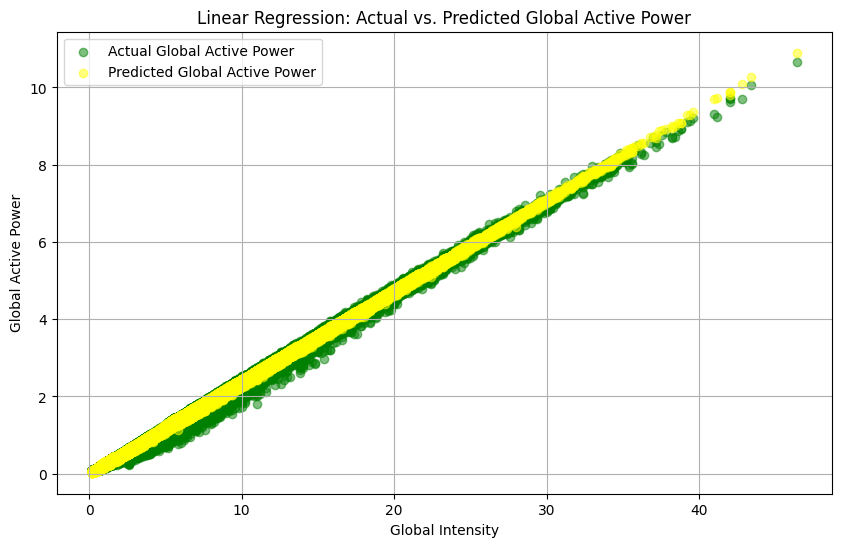

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='green', label='Actual Global Active Power', alpha=0.5) # Actual values
plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='yellow', label='Predicted Global Active Power', alpha=0.5) # Predicted values
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Linear Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

* The above plot compares actual (green) vs. predicted (yellow) **Global Active Power** values against **Global Intensity**, showing how well the Linear Regression model predicts. Overlapping points indicate better accuracy.

**b) Lasso Regression - plotting :**

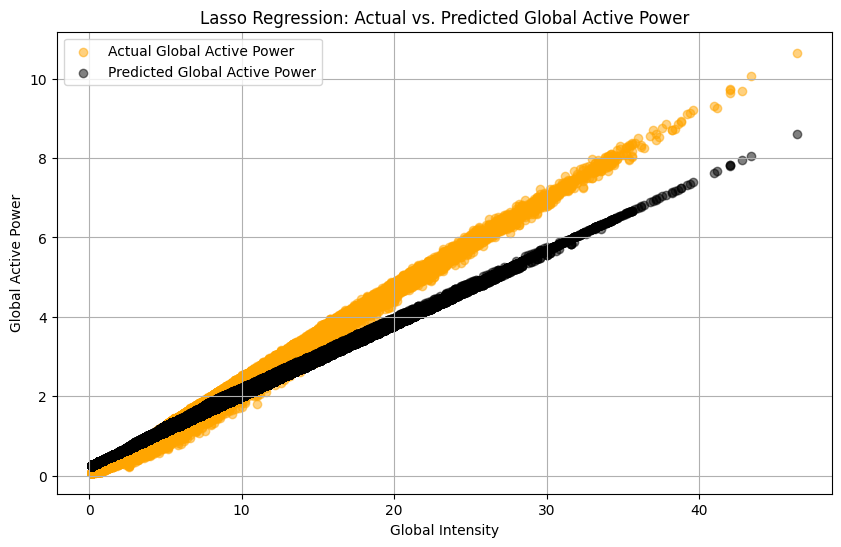

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='orange', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], lasso_predictions, color='black', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Lasso Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

* The above plot compares actual (orange) vs. predicted (black) **Global Active Power** values using **Global Intensity** for the Lasso Regression model. Closer overlap indicates better prediction accuracy.

**c) Ridge Regression - plotting :**

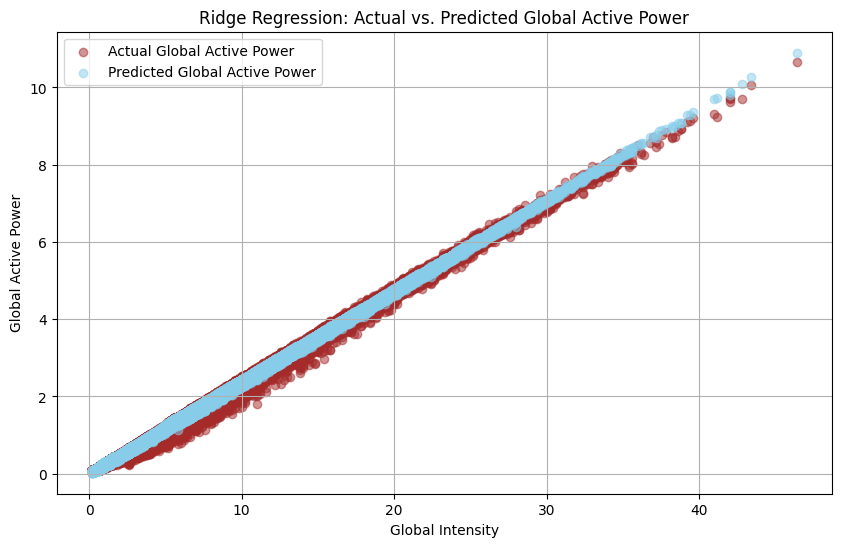

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='brown', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], ridge_predictions, color='skyblue', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Ridge Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

* The above plot shows actual (brown) vs. predicted (sky blue) **Global Active Power** values using **Global Intensity** for the Ridge Regression model. Closer alignment reflects better prediction accuracy.

# 4. Required graphs for ML models :

**a) Linear Regression - graph :**

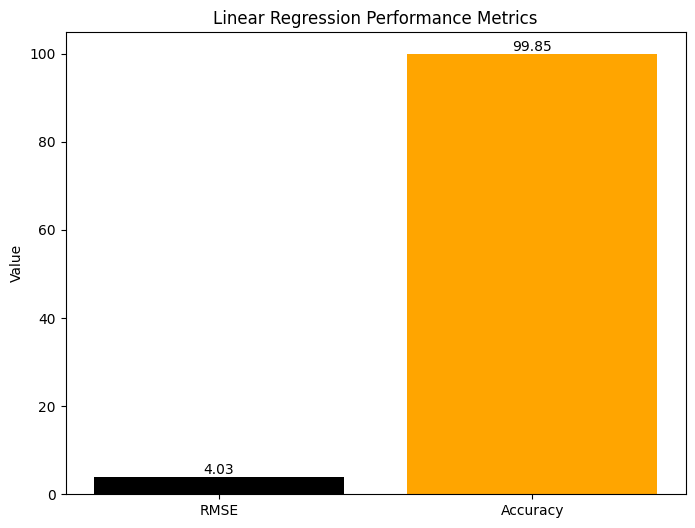

In [35]:
metrics = ['RMSE', 'Accuracy']
values = [rmse, accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['black', 'orange'])
plt.title('Linear Regression Performance Metrics')
plt.ylabel('Value')

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01 , str(round(v,2)), ha='center', va='bottom')

plt.show()

* The above bar graph displays the **RMSE** and **Accuracy** values for the Linear Regression model. It visually highlights the model's error (RMSE) and predictive performance (Accuracy).

**b) Lasso Regression - graph :**

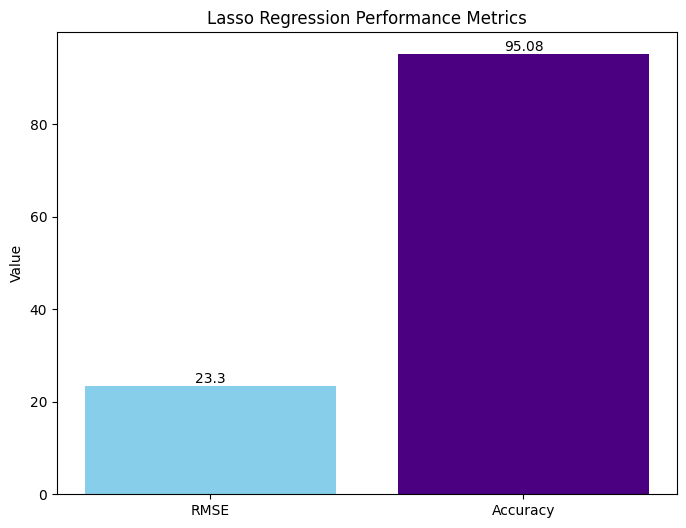

In [38]:
metrics = ['RMSE', 'Accuracy']
values = [lasso_rmse_percentage, lasso_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'indigo'])
plt.title('Lasso Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

* The above bar graph shows the **RMSE** and **Accuracy** values for the Lasso Regression model, visually representing its prediction error (RMSE) and performance (Accuracy).

**c) Ridge Regression - graph :**

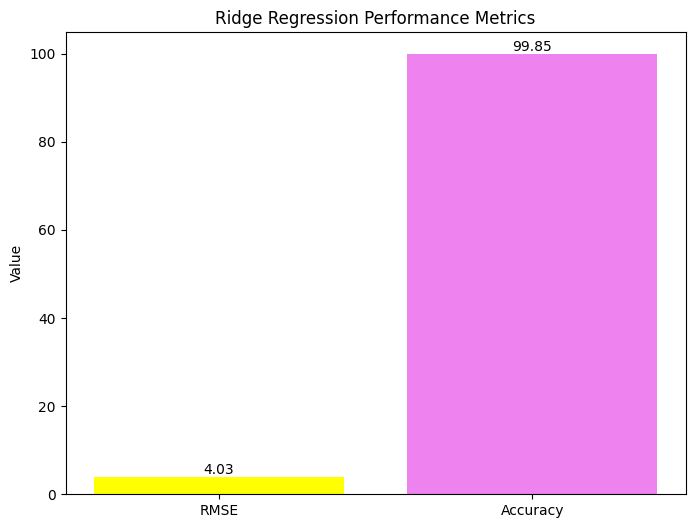

In [41]:
metrics = ['RMSE', 'Accuracy']
values = [ridge_rmse_percentage, ridge_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['yellow', 'violet'])
plt.title('Ridge Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

* The above bar graph displays **RMSE** and **Accuracy** for the Ridge Regression model, showing its prediction error (RMSE) and performance level (Accuracy).

# 5. Compare different ML Models with their accuracies & RMSEs :

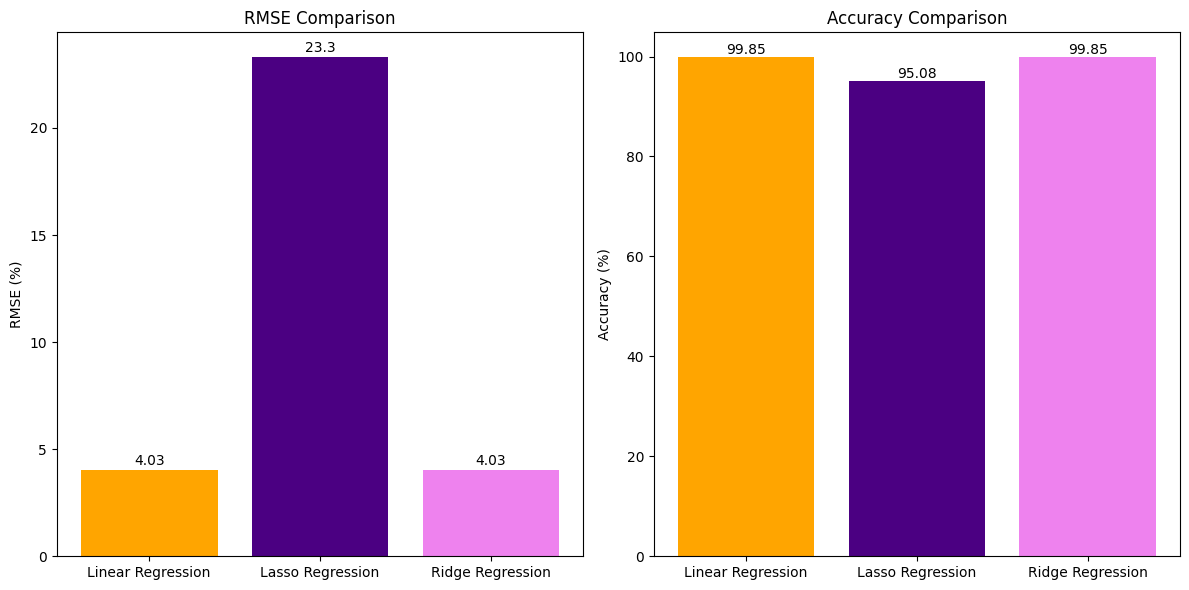

Comparing ML Models with their accuracies & RMSEs :
--------------------------------------------------
Model               RMSE (%)       Accuracy (%)   
--------------------------------------------------
Linear Regression   4.03           99.85          
Lasso Regression    23.30          95.08          
Ridge Regression    4.03           99.85          


In [49]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [rmse, lasso_rmse_percentage, ridge_rmse_percentage]
accuracy_values = [accuracy, lasso_accuracy, ridge_accuracy]

plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['orange', 'indigo', 'violet'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE (%)')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.bar(models, accuracy_values, color=['orange', 'indigo', 'violet'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("Comparing ML Models with their accuracies & RMSEs :")
print("-" * 50)

print(f"{'Model':<20}{'RMSE (%)':<15}{'Accuracy (%)':<15}")
print("-" * 50)
for i in range(3):
    print(f"{models[i]:<20}{rmse_values[i]:<15.2f}{accuracy_values[i]:<15.2f}")

The graphs compare **RMSE** (error) and **Accuracy** (performance) across three models : Linear, Lasso, and Ridge Regression.
* The lowest RMSE and highest accuracy is generally preferred.
* I observed both linear regression & ridge regression have same rmse and accuracies.
* **Left Graph :** Shows the RMSE (%) for each model, with lower values indicating better predictions.  
* **Right Graph :** Displays the Accuracy (%) for each model, with higher values indicating better performance.

This summary provides exact RMSE and Accuracy values for each machine learning model.